In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_csv('E-com_Data.csv')

In [3]:
dataset.head()

CustomerID Item Code  InvoieNo Date of purchase  Quantity        Time  \
0      4355.0     15734  398177.0       29-10-2017       6.0  3:36:00 PM   
1      4352.0     14616  394422.0       05-10-2017       2.0  2:53:00 PM   
2      4352.0     14614  394422.0       12-10-2017       2.0  2:53:00 PM   
3      4352.0    85014B  388633.0       22-08-2017       3.0  2:47:00 PM   
4      4352.0     15364  394422.0       10-10-2017       2.0  2:53:00 PM   

   price per Unit   Price Shipping Location Cancelled_status Reason of return  \
0           321.0  1926.0        Location 1              NaN              NaN   
1           870.0  1740.0        Location 1              NaN              NaN   
2           933.0  1866.0        Location 1              NaN              NaN   
3           623.0  1869.0        Location 1              NaN              NaN   
4           944.0  1888.0        Location 1              NaN              NaN   

   Sold as set  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [6]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
from pandas_profiling import ProfileReport

In [8]:
import ydata_profiling

In [9]:
dataset.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [11]:
dataset = dataset.drop(['Item Code','Quantity','Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'], axis=1)
dataset.head()

CustomerID  InvoieNo Date of purchase   Price
0      4355.0  398177.0       29-10-2017  1926.0
1      4352.0  394422.0       05-10-2017  1740.0
2      4352.0  394422.0       12-10-2017  1866.0
3      4352.0  388633.0       22-08-2017  1869.0
4      4352.0  394422.0       10-10-2017  1888.0

In [12]:
dataset.duplicated().sum()

6008

In [13]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [14]:
dataset.duplicated().sum()

0

In [15]:
dataset = dataset.rename(columns={'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
dataset.head()

CustomerID  InvoiceNo        Date   Price
0      4355.0   398177.0  29-10-2017  1926.0
1      4352.0   394422.0  05-10-2017  1740.0
2      4352.0   394422.0  12-10-2017  1866.0
3      4352.0   388633.0  22-08-2017  1869.0
4      4352.0   394422.0  10-10-2017  1888.0

In [16]:
dataset.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [17]:
dataset= dataset.dropna(subset=['CustomerID'])

In [18]:
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [19]:
# Analysing date part as it was in object converting into datetime
import datetime as dt

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [35]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [36]:
dataset['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [37]:
latest_date= dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [38]:
RFMScore = dataset.groupby('CustomerID').agg({'Date': lambda x : (latest_date - x.max()).days,
                                             'InvoiceNo' : lambda x : x.count(),
                                             'Price' : lambda x : x.sum()})
RFMScore.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetory'},inplace=True)

In [44]:
RFMScore.reset_index()

CustomerID  Recency  Frequency  Monetory
0            2.0        4        181  550416.0
1            3.0       77         27  257404.0
2            4.0       20         72  176613.0
3            5.0       18         16   41976.0
4            6.0        9         84  151822.0
...          ...      ...        ...       ...
4344      4368.0       17         10   20480.0
4345      4369.0      181          7   10774.0
4346      4370.0       12         13   24962.0
4347      4371.0        4        751  279720.0
4348      4372.0       51         68  256952.0

[4349 rows x 4 columns]

In [45]:
for i in RFMScore.columns:
    print("***********************************",i,
         "**********************************************************")
    print()
    print(set(RFMScore[i].tolist()))
    print()

*********************************** Recency **********************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 587, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 526, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 617, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 106, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 155, 157, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 188, 190, 191, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 216, 220, 226, 228, 230, 231, 232, 234, 235, 236, 237, 239, 240, 241, 242

In [46]:
#segmenting the data

In [47]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [48]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [49]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [50]:
RFMScore.Monetory.describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetory, dtype: float64

In [51]:
quantile = RFMScore.quantile(q=[0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [53]:
def recency_score(x, p, d):
    # x means condition, p = percentile/quantile, d = data point
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4  

In [54]:
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile,))

In [55]:
RFMScore

Recency  Frequency  Monetory  R
CustomerID                                 
2.0               4        181  550416.0  1
3.0              77         27  257404.0  4
4.0              20         72  176613.0  3
5.0              18         16   41976.0  2
6.0               9         84  151822.0  1
...             ...        ...       ... ..
4368.0           17         10   20480.0  2
4369.0          181          7   10774.0  4
4370.0           12         13   24962.0  2
4371.0            4        751  279720.0  1
4372.0           51         68  256952.0  3

[4349 rows x 4 columns]

In [56]:
def FnM_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else :
        return 1  

In [57]:
RFMScore['F'] = RFMScore['Frequency'].apply(FnM_score, args=('Frequency', quantile,))
RFMScore['M'] = RFMScore['Monetory'].apply(FnM_score, args=('Monetory', quantile,))

In [58]:
  RFMScore.reset_index()

CustomerID  Recency  Frequency  Monetory  R  F  M
0            2.0        4        181  550416.0  1  1  1
1            3.0       77         27  257404.0  4  3  1
2            4.0       20         72  176613.0  3  2  2
3            5.0       18         16   41976.0  2  4  3
4            6.0        9         84  151822.0  1  2  2
...          ...      ...        ...       ... .. .. ..
4344      4368.0       17         10   20480.0  2  4  4
4345      4369.0      181          7   10774.0  4  4  4
4346      4370.0       12         13   24962.0  2  4  4
4347      4371.0        4        751  279720.0  1  1  1
4348      4372.0       51         68  256952.0  3  2  1

[4349 rows x 7 columns]

In [59]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore.reset_index()

CustomerID  Recency  Frequency  Monetory  R  F  M  RFM
0            2.0        4        181  550416.0  1  1  1  111
1            3.0       77         27  257404.0  4  3  1  431
2            4.0       20         72  176613.0  3  2  2  322
3            5.0       18         16   41976.0  2  4  3  243
4            6.0        9         84  151822.0  1  2  2  122
...          ...      ...        ...       ... .. .. ..  ...
4344      4368.0       17         10   20480.0  2  4  4  244
4345      4369.0      181          7   10774.0  4  4  4  444
4346      4370.0       12         13   24962.0  2  4  4  244
4347      4371.0        4        751  279720.0  1  1  1  111
4348      4372.0       51         68  256952.0  3  2  1  321

[4349 rows x 8 columns]

In [60]:
RFMScore['RFM_Score'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.reset_index()

CustomerID  Recency  Frequency  Monetory  R  F  M  RFM  RFM_Score
0            2.0        4        181  550416.0  1  1  1  111          3
1            3.0       77         27  257404.0  4  3  1  431          8
2            4.0       20         72  176613.0  3  2  2  322          7
3            5.0       18         16   41976.0  2  4  3  243          9
4            6.0        9         84  151822.0  1  2  2  122          5
...          ...      ...        ...       ... .. .. ..  ...        ...
4344      4368.0       17         10   20480.0  2  4  4  244         10
4345      4369.0      181          7   10774.0  4  4  4  444         12
4346      4370.0       12         13   24962.0  2  4  4  244         10
4347      4371.0        4        751  279720.0  1  1  1  111          3
4348      4372.0       51         68  256952.0  3  2  1  321          6

[4349 rows x 9 columns]

In [61]:
RFMScore['RFM_Score'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM_Score, dtype: int64

In [62]:
Loyal_customer = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMScore.RFM_Score, q=4, labels=Loyal_customer)
RFMScore['Loyal_customer'] = score_cuts.values
RFMScore.reset_index()

CustomerID  Recency  Frequency  Monetory  R  F  M  RFM  RFM_Score  \
0            2.0        4        181  550416.0  1  1  1  111          3   
1            3.0       77         27  257404.0  4  3  1  431          8   
2            4.0       20         72  176613.0  3  2  2  322          7   
3            5.0       18         16   41976.0  2  4  3  243          9   
4            6.0        9         84  151822.0  1  2  2  122          5   
...          ...      ...        ...       ... .. .. ..  ...        ...   
4344      4368.0       17         10   20480.0  2  4  4  244         10   
4345      4369.0      181          7   10774.0  4  4  4  444         12   
4346      4370.0       12         13   24962.0  2  4  4  244         10   
4347      4371.0        4        751  279720.0  1  1  1  111          3   
4348      4372.0       51         68  256952.0  3  2  1  321          6   

     Loyal_customer  
0          Platinum  
1              Gold  
2              Gold  
3            Silver  
4          Platinum  
...             ...  
4344         Silver  
4345         Bronze  
4346         Silver  
4347       Platinum  
4348           Gold  

[4349 rows x 10 columns]

In [63]:
RFMScore = RFMScore.reset_index()
RFMScore

CustomerID  Recency  Frequency  Monetory  R  F  M  RFM  RFM_Score  \
0            2.0        4        181  550416.0  1  1  1  111          3   
1            3.0       77         27  257404.0  4  3  1  431          8   
2            4.0       20         72  176613.0  3  2  2  322          7   
3            5.0       18         16   41976.0  2  4  3  243          9   
4            6.0        9         84  151822.0  1  2  2  122          5   
...          ...      ...        ...       ... .. .. ..  ...        ...   
4344      4368.0       17         10   20480.0  2  4  4  244         10   
4345      4369.0      181          7   10774.0  4  4  4  444         12   
4346      4370.0       12         13   24962.0  2  4  4  244         10   
4347      4371.0        4        751  279720.0  1  1  1  111          3   
4348      4372.0       51         68  256952.0  3  2  1  321          6   

     Loyal_customer  
0          Platinum  
1              Gold  
2              Gold  
3            Silver  
4          Platinum  
...             ...  
4344         Silver  
4345         Bronze  
4346         Silver  
4347       Platinum  
4348           Gold  

[4349 rows x 10 columns]

In [64]:
RFMScore.to_csv("Segmentation_analysis.csv")

In [65]:
new_datapoint = RFMScore.groupby('Loyal_customer')[['Recency', 'Frequency','Monetory','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()

In [66]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':"No_Of_Customer"} )
new_datapoint

Loyal_customer  Recency  Frequency     Monetory  No_Of_Customer
0       Platinum    13340     297150  765731356.0            1308
1           Gold    42079      73994  160271639.0            1289
2         Silver    78927      23588   52766014.1             940
3         Bronze   132879       8127   19300105.0             812

In [67]:
new_datapoint['Percentage'] = round(new_datapoint['No_Of_Customer'] / new_datapoint.No_Of_Customer.sum()*100, 2)

In [68]:
new_datapoint

Loyal_customer  Recency  Frequency     Monetory  No_Of_Customer  Percentage
0       Platinum    13340     297150  765731356.0            1308       30.08
1           Gold    42079      73994  160271639.0            1289       29.64
2         Silver    78927      23588   52766014.1             940       21.61
3         Bronze   132879       8127   19300105.0             812       18.67

In [69]:
new_datapoint = new_datapoint.drop(['Recency', 'Frequency', 'Monetory'], axis=1)

In [70]:
new_datapoint

Loyal_customer  No_Of_Customer  Percentage
0       Platinum            1308       30.08
1           Gold            1289       29.64
2         Silver             940       21.61
3         Bronze             812       18.67

In [80]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


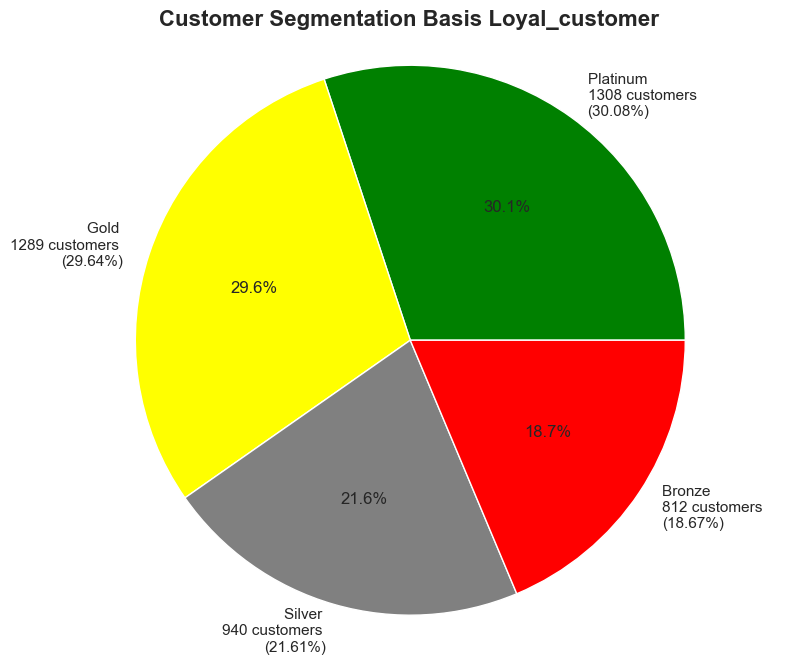

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
colors = ['green', 'yellow', 'gray', 'red']

labels = ['{} \n{:.0f} customers \n({:.2f}%)'.format(category, count, percentage)
          for category, count, percentage in zip(new_datapoint['Loyal_customer'], new_datapoint['No_Of_Customer'], new_datapoint['Percentage'])]

plt.pie(new_datapoint['No_Of_Customer'], labels=labels, colors=colors, autopct='%1.1f%%')

plt.title("Customer Segmentation Basis Loyal_customer", fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


In [81]:
import squarify

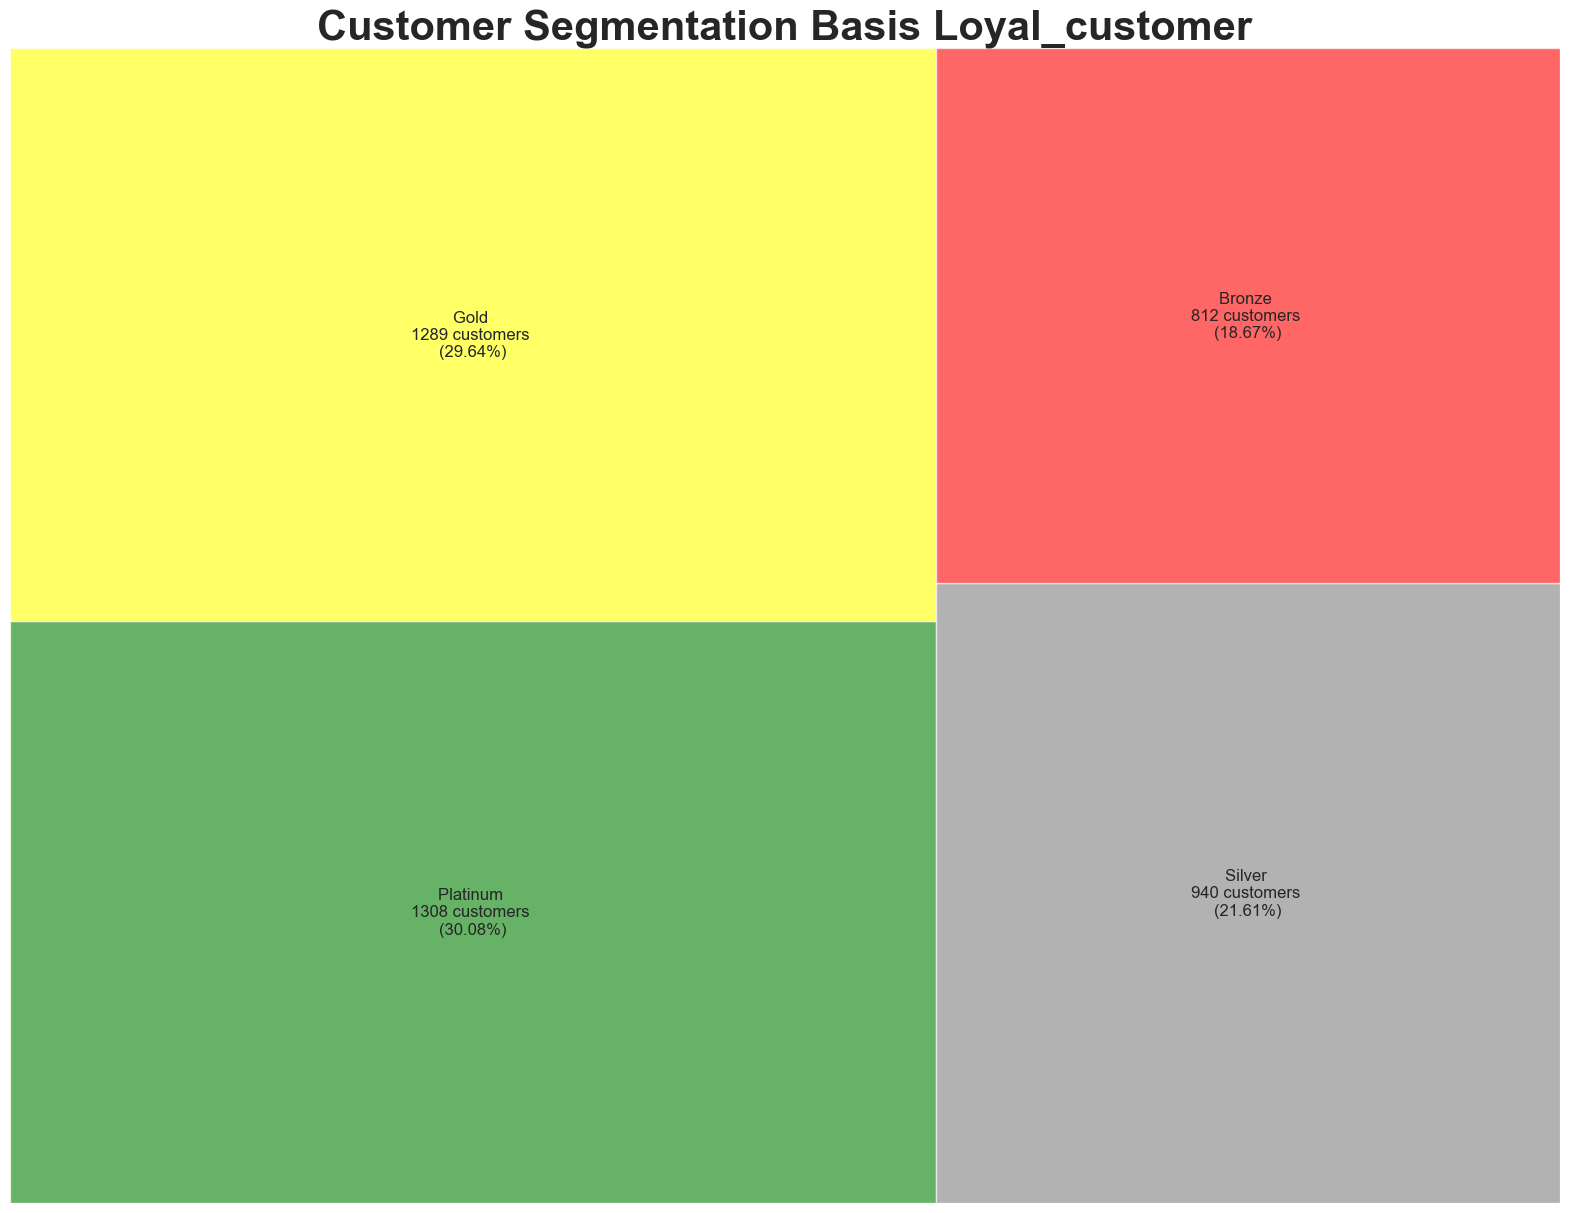

In [82]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=new_datapoint['No_Of_Customer'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*new_datapoint.iloc[i]) 
                      for i in range(0, len(new_datapoint))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=30, fontweight='bold')
plt.axis("off")
plt.show()

In [83]:
#building model - unsupervised method - K means

In [84]:
RFMScore

CustomerID  Recency  Frequency  Monetory  R  F  M  RFM  RFM_Score  \
0            2.0        4        181  550416.0  1  1  1  111          3   
1            3.0       77         27  257404.0  4  3  1  431          8   
2            4.0       20         72  176613.0  3  2  2  322          7   
3            5.0       18         16   41976.0  2  4  3  243          9   
4            6.0        9         84  151822.0  1  2  2  122          5   
...          ...      ...        ...       ... .. .. ..  ...        ...   
4344      4368.0       17         10   20480.0  2  4  4  244         10   
4345      4369.0      181          7   10774.0  4  4  4  444         12   
4346      4370.0       12         13   24962.0  2  4  4  244         10   
4347      4371.0        4        751  279720.0  1  1  1  111          3   
4348      4372.0       51         68  256952.0  3  2  1  321          6   

     Loyal_customer  
0          Platinum  
1              Gold  
2              Gold  
3            Silver  
4          Platinum  
...             ...  
4344         Silver  
4345         Bronze  
4346         Silver  
4347       Platinum  
4348           Gold  

[4349 rows x 10 columns]

In [85]:
RFMScore1 = RFMScore.iloc[:,1:4]
RFMScore1

Recency  Frequency  Monetory
0           4        181  550416.0
1          77         27  257404.0
2          20         72  176613.0
3          18         16   41976.0
4           9         84  151822.0
...       ...        ...       ...
4344       17         10   20480.0
4345      181          7   10774.0
4346       12         13   24962.0
4347        4        751  279720.0
4348       51         68  256952.0

[4349 rows x 3 columns]

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
RFMScore1_sc = sc.fit_transform(RFMScore1)
RFMScore1_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [87]:
scaled_data = pd.DataFrame(RFMScore1_sc, index=RFMScore1.index, columns= RFMScore1.columns)
scaled_data

Recency  Frequency  Monetory
0    -0.640796   0.383014  0.375097
1     0.173513  -0.284474  0.032622
2    -0.462317  -0.089428 -0.061808
3    -0.484627  -0.332151 -0.219173
4    -0.585021  -0.037416 -0.090784
...        ...        ...       ...
4344 -0.495782  -0.358157 -0.244298
4345  1.333623  -0.371160 -0.255642
4346 -0.551556  -0.345154 -0.239059
4347 -0.640796   2.853587  0.058705
4348 -0.116515  -0.106766  0.032093

[4349 rows x 3 columns]

In [88]:
# Building KMeans Cluster

from sklearn.cluster import KMeans

In [89]:
wcss = []

for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [90]:
wcss

[9014.850261247648,
 5556.252595830581,
 4360.031655505539,
 3346.87429512249,
 2481.0756115519907,
 1978.0159487281853,
 1708.4226746616323,
 1496.5260309486198,
 1302.0654193907108,
 1135.2984482971226,
 985.8855468498049,
 864.6200520264739,
 768.3196400397624]

In [91]:
abc= [1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

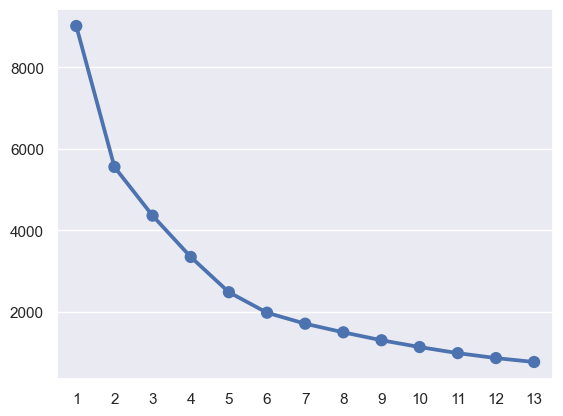

In [92]:
#elbow method

sns.pointplot(abc,wcss)

In [93]:
KM = KMeans(n_clusters=8, init='k-means++',max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 4, 4, ..., 4, 6, 4])

In [94]:
scaled_data['Cluster'] = KM.labels_

In [95]:
scaled_data

Recency  Frequency  Monetory  Cluster
0    -0.640796   0.383014  0.375097        0
1     0.173513  -0.284474  0.032622        4
2    -0.462317  -0.089428 -0.061808        4
3    -0.484627  -0.332151 -0.219173        4
4    -0.585021  -0.037416 -0.090784        4
...        ...        ...       ...      ...
4344 -0.495782  -0.358157 -0.244298        4
4345  1.333623  -0.371160 -0.255642        7
4346 -0.551556  -0.345154 -0.239059        4
4347 -0.640796   2.853587  0.058705        6
4348 -0.116515  -0.106766  0.032093        4

[4349 rows x 4 columns]

In [96]:
scaled_data['Cluster'].value_counts()

4    2643
0     700
7     500
1     353
6     135
5      13
3       4
2       1
Name: Cluster, dtype: int64

In [97]:
RFMScore1['Cluster'] = KM.labels_

In [98]:
RFMScore1

Recency  Frequency  Monetory  Cluster
0           4        181  550416.0        0
1          77         27  257404.0        4
2          20         72  176613.0        4
3          18         16   41976.0        4
4           9         84  151822.0        4
...       ...        ...       ...      ...
4344       17         10   20480.0        4
4345      181          7   10774.0        7
4346       12         13   24962.0        4
4347        4        751  279720.0        6
4348       51         68  256952.0        4

[4349 rows x 4 columns]

In [99]:
# pls try - silhouette_score value 
# Hierarichal cluster

In [100]:
from sklearn.metrics import silhouette_score

In [106]:
score = silhouette_score(scaled_data, KM.labels_)

In [107]:
print("Silhouette Score:", score)

Silhouette Score: 0.846410045490126


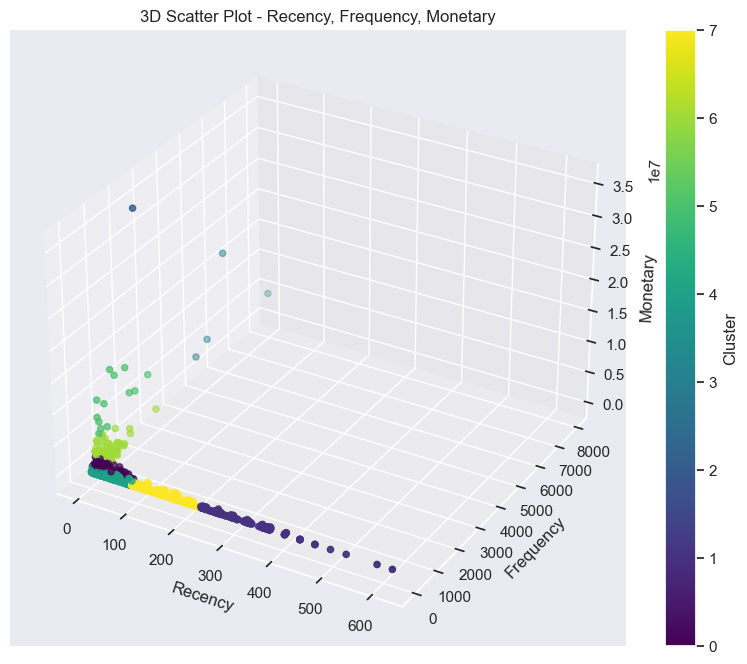

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(RFMScore1['Recency'], RFMScore1['Frequency'], RFMScore1['Monetory'], c=RFMScore1['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add a colorbar to show the color mapping for clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.title('3D Scatter Plot - Recency, Frequency, Monetary')
plt.show()


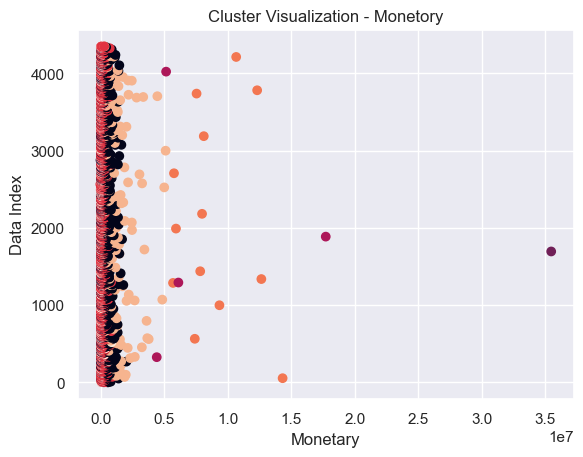

In [122]:
plt.scatter(RFMScore1['Monetory'], RFMScore1.index, c=RFMScore1['Cluster'])
plt.xlabel('Monetary')
plt.ylabel('Data Index')
plt.title('Cluster Visualization - Monetory')
plt.show()


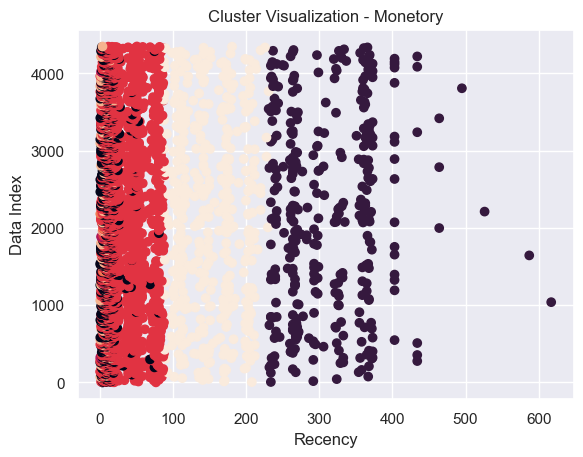

In [123]:
plt.scatter(RFMScore1['Recency'], RFMScore1.index, c=RFMScore1['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Data Index')
plt.title('Cluster Visualization - Monetory')
plt.show()


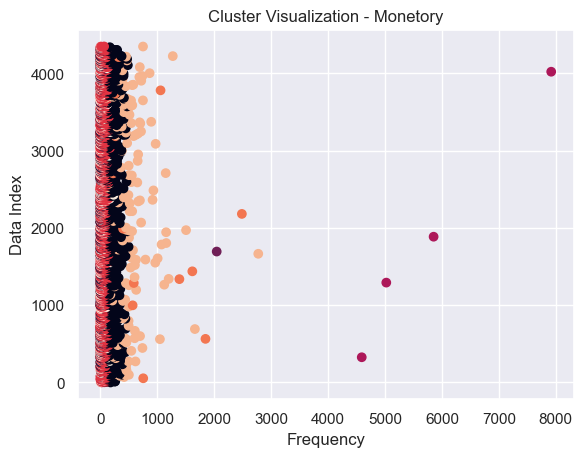

In [124]:
plt.scatter(RFMScore1['Frequency'], RFMScore1.index, c=RFMScore1['Cluster'])
plt.xlabel('Frequency')
plt.ylabel('Data Index')
plt.title('Cluster Visualization - Monetory')
plt.show()


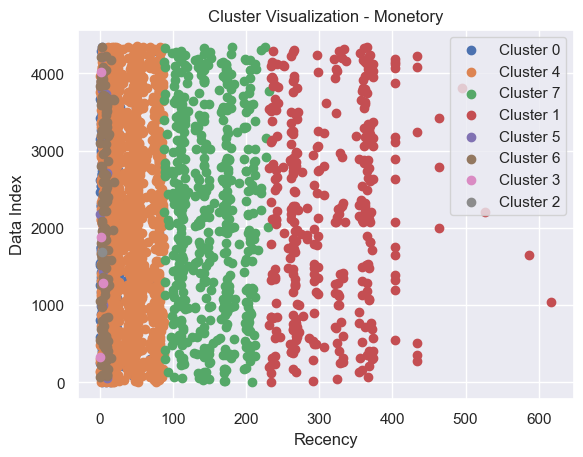

In [125]:
import matplotlib.pyplot as plt

# Create separate scatter plots for each cluster
for cluster_label in RFMScore1['Cluster'].unique():
    cluster_data = RFMScore1[RFMScore1['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Recency'], cluster_data.index, label=f'Cluster {cluster_label}')

plt.xlabel('Recency')
plt.ylabel('Data Index')
plt.title('Cluster Visualization - Monetory')

# Add legend
plt.legend()

plt.show()


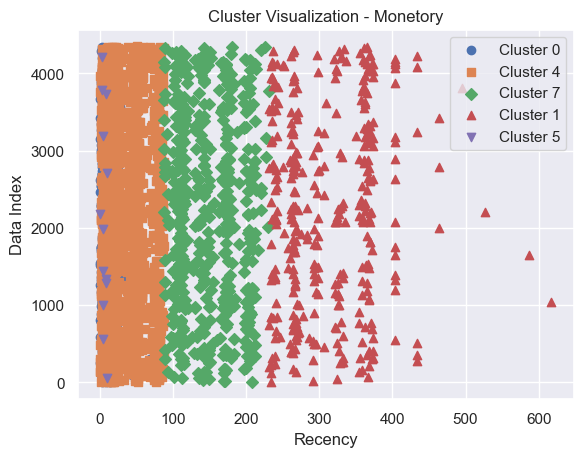

In [126]:
import matplotlib.pyplot as plt

# Define marker styles for each cluster
marker_styles = ['o', 's', 'D', '^', 'v']

# Create separate scatter plots for each cluster
for cluster_label, marker in zip(RFMScore1['Cluster'].unique(), marker_styles):
    cluster_data = RFMScore1[RFMScore1['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Recency'], cluster_data.index, marker=marker, label=f'Cluster {cluster_label}')

plt.xlabel('Recency')
plt.ylabel('Data Index')
plt.title('Cluster Visualization - Monetory')

# Add legend
plt.legend()

plt.show()


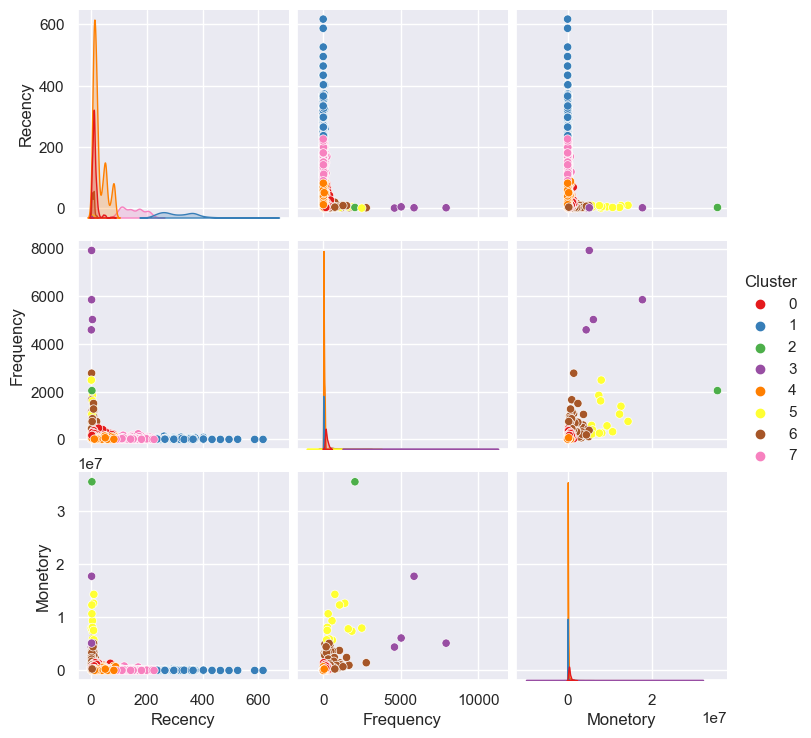

In [128]:
import seaborn as sns

# Add the 'Cluster' column to the RFMScore1 DataFrame
RFMScore1['Cluster'] = KM.labels_

# Specify the variables for the scatter plot matrix
variables = ['Recency', 'Frequency', 'Monetory']

# Create the scatter plot matrix with cluster colors
sns.pairplot(RFMScore1, vars=variables, hue='Cluster', palette='Set1')

plt.show()



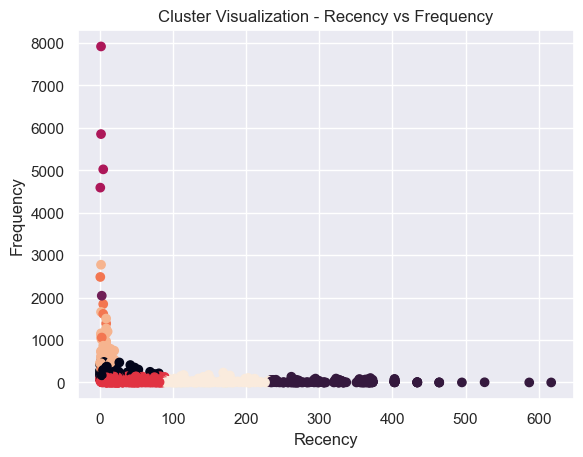

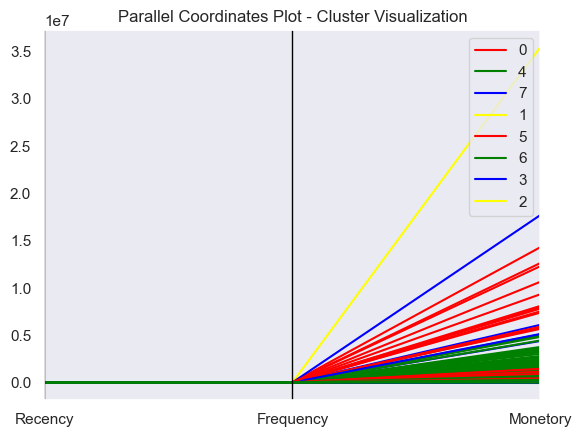

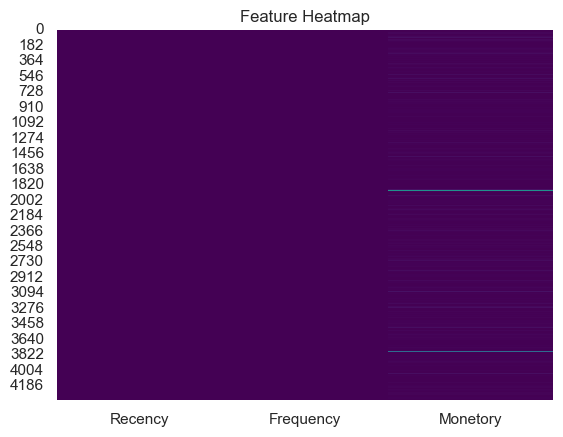

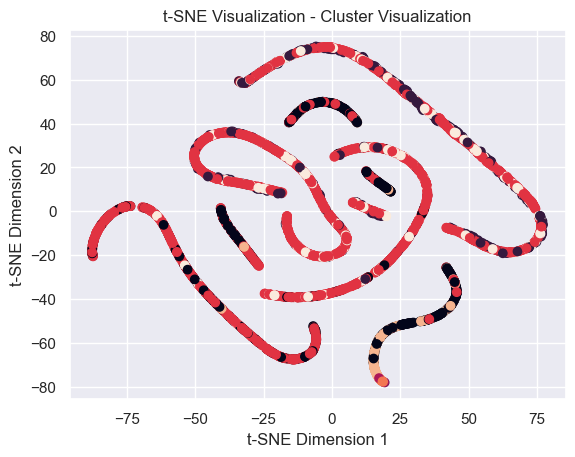

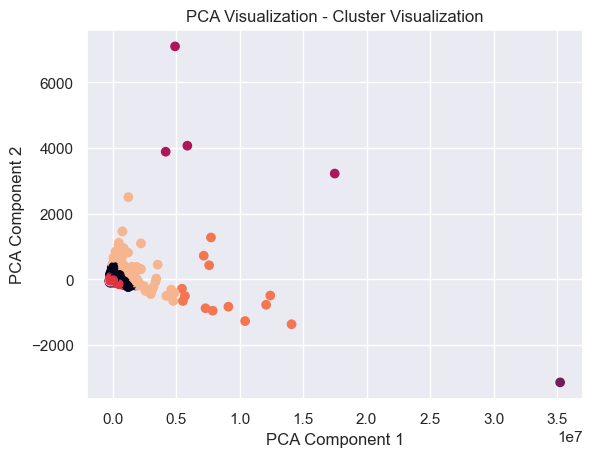

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates


# Scatter Plot

plt.scatter(RFMScore1['Recency'], RFMScore1['Frequency'], c=RFMScore1['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Visualization - Recency vs Frequency')
plt.show()

# Parallel Coordinates Plot
parallel_coordinates(RFMScore1, 'Cluster', color=('red', 'green', 'blue', 'yellow'))
plt.title('Parallel Coordinates Plot - Cluster Visualization')
plt.show()

# Heatmap
sns.heatmap(RFMScore1.drop('Cluster', axis=1), cmap='viridis', cbar=False)
plt.title('Feature Heatmap')
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(RFMScore1.drop('Cluster', axis=1))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=RFMScore1['Cluster'])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization - Cluster Visualization')
plt.show()

# PCA Visualization
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(RFMScore1.drop('Cluster', axis=1))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=RFMScore1['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization - Cluster Visualization')
plt.show()


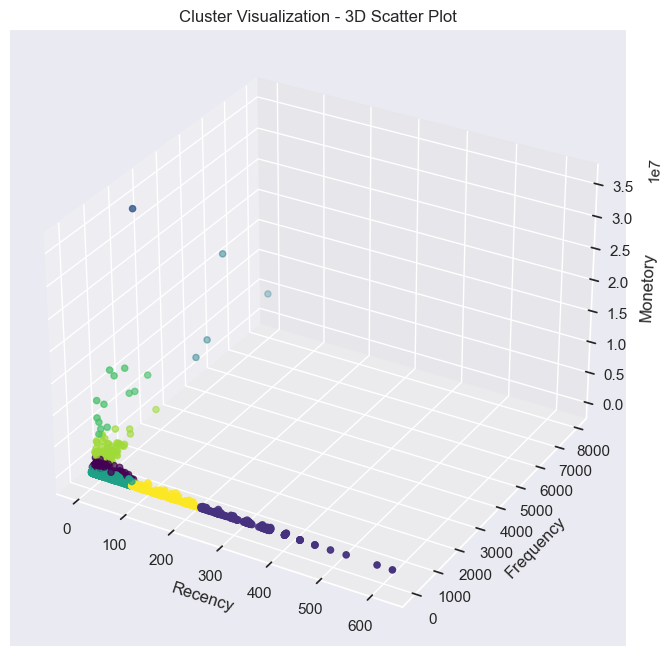

In [131]:
# Scatter plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFMScore1['Recency'], RFMScore1['Frequency'], RFMScore1['Monetory'], c=RFMScore1['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')
plt.title('Cluster Visualization - 3D Scatter Plot')
plt.show()


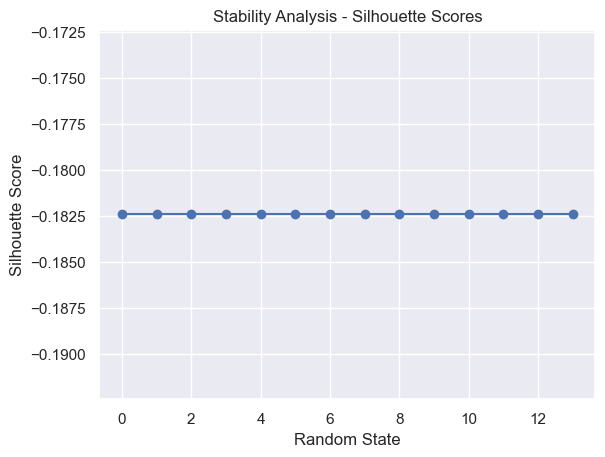

In [135]:
# Perform stability analysis

scores = []
for i in range(14):
    KM = KMeans(n_clusters=8, init='k-means++',max_iter=1000, random_state=1)
    y_kmeans = KM.fit_predict(scaled_data)
    score = silhouette_score(RFMScore1[['Recency', 'Frequency', 'Monetory']], KM.labels_)
    scores.append(score)
    
# Plot silhouette scores
plt.plot(range(14), scores, marker='o')
plt.xlabel('Random State')
plt.ylabel('Silhouette Score')
plt.title('Stability Analysis - Silhouette Scores')
plt.show()


In [136]:
# Calculate cluster coherence
silhouette_avg = silhouette_score(RFMScore1[['Recency', 'Frequency', 'Monetory']], RFMScore1['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.18242852987209218


In [139]:
from sklearn.metrics import pairwise_distances

# Calculate the pairwise distances between cluster centroids
centroids = KM.cluster_centers_
separation = pairwise_distances(centroids)

# Average the distances to get the separation score
separation_score = separation.mean()


In [140]:
separation_score

16.70387297217347

In [145]:
# Calculate the distances between data points and their cluster centroid
distances = pairwise_distances(X, centroids)

# Assign each data point to its closest cluster centroid
labels = KM.labels_

features = ['Recency', 'Frequency', 'Monetory']
X = RFMScore1[features]

# Calculate the compactness score
compactness_score = np.mean(distances[np.arange(len(X)), labels])

NameError: name 'X' is not defined

In [146]:
cluster_centroids = KM.cluster_centers_
representative_points = scaled_data[KM.labels_ == cluster_number]


NameError: name 'cluster_number' is not defined